<a href="https://colab.research.google.com/github/Daniel-Francisco-Calderon-Lebro/Vision_por_Computador/blob/main/ContadorConcannyConCerebroRata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # para visualizar imágenes
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
%matplotlib inline


ruta = '/content/drive/MyDrive/Vision por computador'


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
img = io.imread(ruta + '/arroz_ilum.png') # Lee imagen
# img = io.imread(ruta + 'Lena.png') # Lee imagen
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # Convierte imagen a tonos de gris
#cv2_imshow(img)
#cv.imwrite(ruta + '/Cerebrorata_gris.png', img)

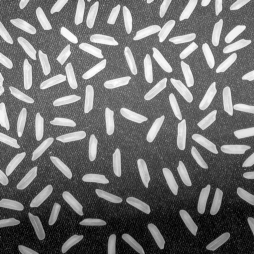

In [4]:
# Encontrar el valor mínimo y máximo de la imagen
min_val = np.min(img)
max_val = np.max(img)

# Expandir la imagen para que el valor mínimo sea 0 y el valor máximo sea 255
expanded_image = ((img - min_val) / (max_val - min_val)) * 255

# Convertir la imagen a tipo entero sin signo de 8 bits
expanded_image = np.uint8(expanded_image)

cv2_imshow(expanded_image)

## Detector Canny

Bordes canny


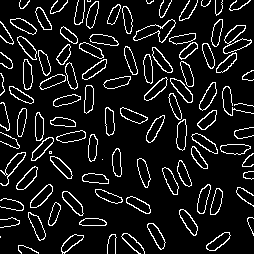

In [5]:
 edges = cv.Canny(expanded_image,200,255)
 print('Bordes canny')
 cv2_imshow(edges)

In [6]:
# Encontrar contornos en la imagen de bordes
contours, _ = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)


Se encontraron 98 células en la imagen.


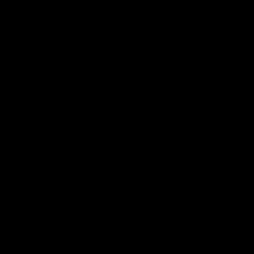

In [7]:
area_minima = 0.001

celulas_contadas = sum(1 for c in contours if cv.contourArea(c) > area_minima)
print(f"Se encontraron {celulas_contadas} células en la imagen.")

cv.drawContours(edges, contours, -1, (0, 255, 0), 2)
cv2_imshow(edges)


Se encontraron 95 células en la imagen.


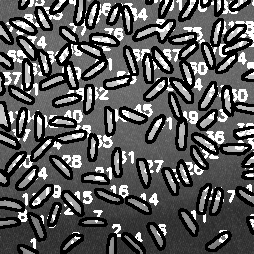

In [10]:


# Aplicar suavizado gaussiano para reducir el ruido
img_smoothed = cv.GaussianBlur(expanded_image, (5, 5), 0)

# Aplicar el detector de bordes Canny con umbrales adaptativos
edges = cv.Canny(img_smoothed, 0, 255)

# Encontrar contornos en la imagen de bordes
contours, _ = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Definir el área mínima para una célula
area_minima = 1

# Contar el número de células con área mayor que el área mínima
celulas_contadas = sum(1 for c in contours if cv.contourArea(c) > area_minima)
print(f"Se encontraron {celulas_contadas} células en la imagen.")

# Dibujar los contornos encontrados en la imagen original
img_contornos = img.copy()
cv.drawContours(img_contornos, contours, -1, (0, 255, 0), 2)

# Mostrar la imagen con los contornos dibujados
cv2_imshow(img_contornos)


Se encontraron 95 células en la imagen.


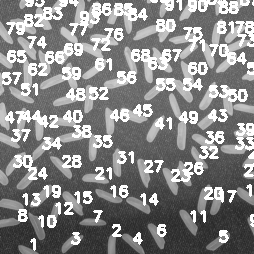

In [9]:
# Aplicar suavizado gaussiano para reducir el ruido
img_smoothed = cv.GaussianBlur(expanded_image, (5, 5), 0)

# Aplicar el detector de bordes Canny con umbrales adaptativos
edges = cv.Canny(img_smoothed, 0, 255)
#edges = cv.Canny(img_smoothed, 30, 100)

# Encontrar contornos en la imagen de bordes
contours, _ = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Definir el área mínima para una célula

area_minima = 1

# Contar el número de células con área mayor que el área mínima
celulas_contadas = 0
for i, c in enumerate(contours):
    if cv.contourArea(c) > area_minima:
        celulas_contadas += 1
        # Calcular el centro del contorno
        M = cv.moments(c)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        # Dibujar el número en el centro del contorno
        cv.putText(img, str(celulas_contadas), (cX, cY), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

print(f"Se encontraron {celulas_contadas} células en la imagen.")

# Dibujar los contornos encontrados en la imagen original
img_contornos = cv.cvtColor(edges, cv.COLOR_GRAY2BGR)
cv.drawContours(img_contornos, contours, -1, (0, 255, 0), 2)

# Mostrar la imagen con los contornos dibujados y los números
cv2_imshow(img)
